[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jewelkang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jewelkang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jewelkang/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Num Topics: 1 — Coherence Score: 0.3830
Num Topics: 2 — Coherence Score: 0.4824
Num Topics: 3 — Coherence Score: 0.4709
Num Topics: 4 — Coherence Score: 0.5006
Num Topics: 5 — Coherence Score: 0.4845
Num Topics: 6 — Coherence Score: 0.4902
Num Topics: 7 — Coherence Score: 0.5318
Num Topics: 8 — Coherence Score: 0.5242
Num Topics: 9 — Coherence Score: 0.5064
Num Topics: 10 — Coherence Score: 0.5257
Num Topics: 11 — Coherence Score: 0.5259
Num Topics: 12 — Coherence Score: 0.5199
Num Topics: 13 — Coherence Score: 0.5613
Num Topics: 14 — Coherence Score: 0.5129
Num Topics: 15 — Coherence Score: 0.5318


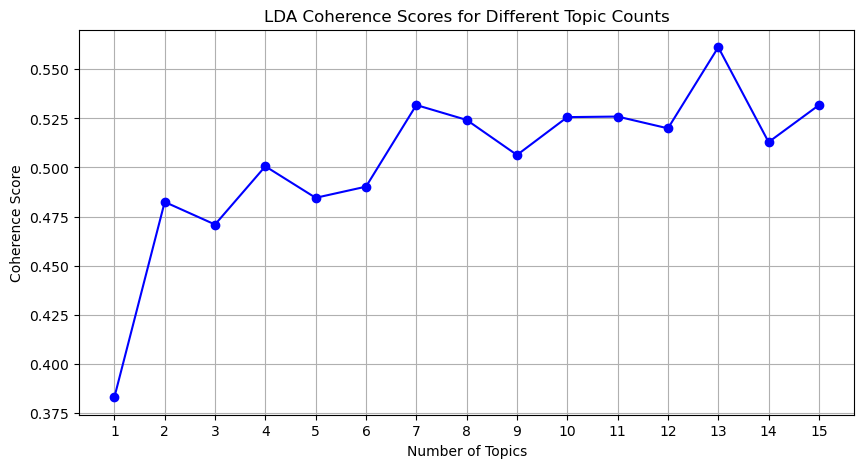

In [3]:
import pandas as pd
import re
import html
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.corpora import Dictionary
from gensim.models import LdaModel, CoherenceModel
import matplotlib.pyplot as plt

# Download necessary resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load dataset
file_path = "/Users/jewelkang/Desktop/SMU/Year 1 Sem 2/Text Analytics/Text Analytics Project/drug_no.xlsx"
df = pd.read_excel(file_path)

# Remove nulls
df = df.dropna(subset=['review'])
reviews = df['review'].astype(str).tolist()

# Define stopwords (include domain-specific ones)
custom_stopwords = set(stopwords.words('english')).union({
    "i039", "v", "amp", "use", "take", "get", "like", "work", "year", "month", "week", "day", 
    "first", "one", "two", "three", "also", "since", "may", "could", "new", "doctor", "said", 
    "told", "know", "see", "took", "read", "would", "still", "got", "really", "im", "ive", 
    "dont", "doesnt", "didnt", "wasnt", "youre", "theyre", "weve", "youve"
})

lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = html.unescape(text)                    # fix i039; and amp;
    text = re.sub(r'[^a-zA-Z\s]', '', text)       # remove numbers and punctuation
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in custom_stopwords]
    return words

# Apply to all reviews
cleaned_reviews = [preprocess(review) for review in reviews]

# Create Dictionary and Corpus for LDA
dictionary = Dictionary(cleaned_reviews)
corpus = [dictionary.doc2bow(text) for text in cleaned_reviews]

# Function to compute coherence
def compute_coherence_values(dictionary, corpus, texts, start=1, limit=15, step=1):
    coherence_values = []
    topic_numbers = []
    
    for num_topics in range(start, limit + 1, step):
        model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence = coherence_model.get_coherence()
        coherence_values.append(coherence)
        topic_numbers.append(num_topics)
        print(f"Num Topics: {num_topics} — Coherence Score: {coherence:.4f}")
    
    return topic_numbers, coherence_values

# Run coherence testing (10–15 topics)
topic_numbers, coherence_scores = compute_coherence_values(dictionary, corpus, cleaned_reviews)

# Plot
plt.figure(figsize=(10,5))
plt.plot(topic_numbers, coherence_scores, marker='o', color='blue')
plt.title("LDA Coherence Scores for Different Topic Counts")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.xticks(topic_numbers)
plt.grid(True)
plt.show()


In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim.models import LdaModel

# Final LDA model using 13 topics
lda_model_final = LdaModel(corpus=corpus,
                           id2word=dictionary,
                           num_topics=13,
                           random_state=42,
                           passes=10)

# Print Top Keywords Per Topic
print("Top Words per Topic:")
for idx, topic in lda_model_final.print_topics(-1):
    print(f"Topic {idx}: {topic}")


Top Words per Topic:
Topic 0: 0.047*"weight" + 0.033*"lb" + 0.031*"lost" + 0.020*"pound" + 0.019*"started" + 0.017*"eat" + 0.013*"month" + 0.012*"loss" + 0.012*"eating" + 0.011*"gain"
Topic 1: 0.028*"mg" + 0.027*"year" + 0.026*"work" + 0.019*"time" + 0.018*"medicine" + 0.016*"well" + 0.014*"worked" + 0.014*"medication" + 0.013*"tried" + 0.013*"great"
Topic 2: 0.030*"anxiety" + 0.027*"mg" + 0.025*"life" + 0.018*"depression" + 0.017*"year" + 0.012*"medication" + 0.010*"attack" + 0.010*"taking" + 0.010*"feel" + 0.009*"panic"
Topic 3: 0.024*"infection" + 0.018*"day" + 0.013*"burning" + 0.012*"symptom" + 0.011*"itching" + 0.010*"reaction" + 0.010*"went" + 0.010*"eye" + 0.009*"prescribed" + 0.008*"antibiotic"
Topic 4: 0.033*"period" + 0.020*"bleeding" + 0.017*"day" + 0.017*"month" + 0.015*"cramp" + 0.013*"week" + 0.013*"shot" + 0.012*"year" + 0.011*"insertion" + 0.010*"spotting"
Topic 5: 0.022*"review" + 0.022*"pill" + 0.012*"people" + 0.010*"time" + 0.010*"plan" + 0.010*"day" + 0.010*"hour"

In [42]:
# Assign each review its dominant topic
dominant_topics = []
topic_probs = []

for doc_bow in corpus:
    topic_dist = lda_model_final.get_document_topics(doc_bow)
    dominant_topic = max(topic_dist, key=lambda x: x[1])[0]
    dominant_topics.append(dominant_topic)
    topic_probs.append(dict(topic_dist))

df['Dominant_Topic'] = dominant_topics
df['Topic_Distribution'] = topic_probs



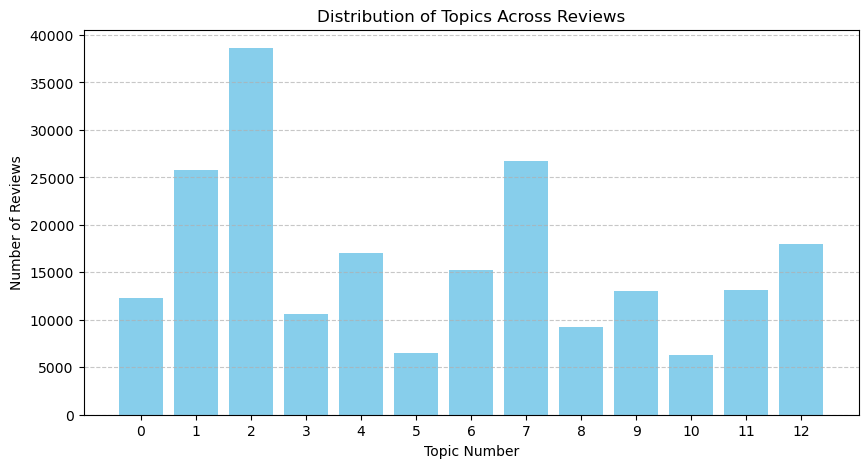

In [44]:
# Distribution of topics across reviews
import collections
topic_counts = collections.Counter(dominant_topics)
plt.figure(figsize=(10, 5))
plt.bar(topic_counts.keys(), topic_counts.values(), color='skyblue')
plt.xlabel("Topic Number")
plt.ylabel("Number of Reviews")
plt.title("Distribution of Topics Across Reviews")
plt.xticks(range(13))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


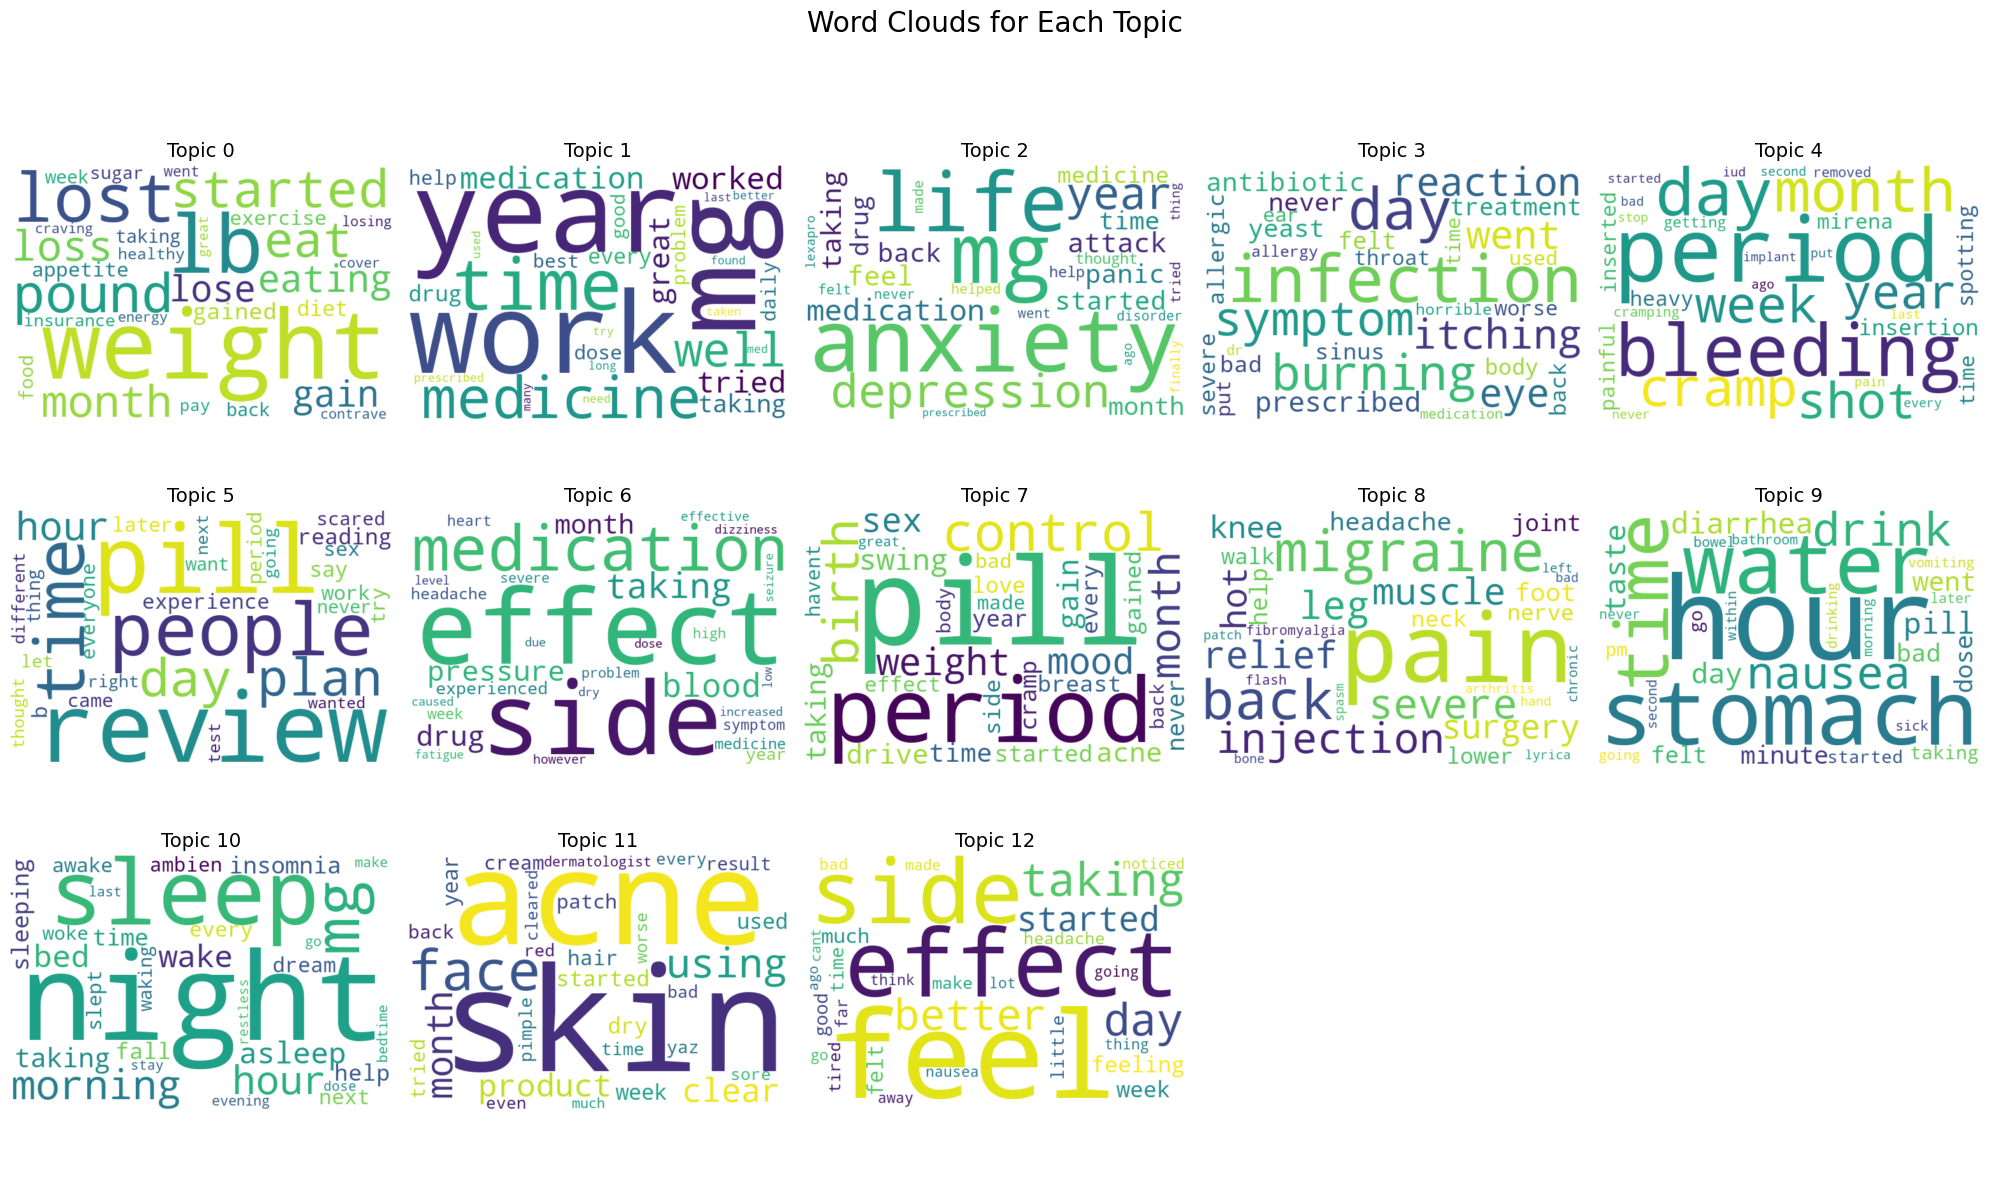

In [64]:
# WordClouds
rows, cols = 3, 5
fig, axes = plt.subplots(rows, cols, figsize=(20, 12))
fig.suptitle("Word Clouds for Each Topic", fontsize=20)
axes = axes.flatten()
for topic_id in range(13):
    topic_words = dict(lda_model_final.show_topic(topic_id, topn=30))
    wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(topic_words)
    axes[topic_id].imshow(wordcloud, interpolation='bilinear')
    axes[topic_id].axis("off")
    axes[topic_id].set_title(f"Topic {topic_id}", fontsize=14)
for i in range(13, len(axes)):
    axes[i].axis("off")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("/Users/jewelkang/Desktop/SMU/Year 1 Sem 2/Text Analytics/Text Analytics Project/wordcloud_topics.png", dpi=300)
plt.show()




In [58]:
# Create topic summary table
topics_data = []
for topic_id in range(13):
    top_words = lda_model_final.show_topic(topic_id, topn=10)
    keywords = ", ".join([word for word, _ in top_words])
    topics_data.append((topic_id, keywords))
topic_summary_df = pd.DataFrame(topics_data, columns=["Topic #", "Top Keywords"])

# Manual topic labels
topic_labels = [
    "Weight Loss & Appetite", 
    "Medication Effectiveness", 
    "Anxiety & Depression", 
    "Infections & Reactions", 
    "Menstrual Cycle & Bleeding", 
    "General Experiences / Reviews", 
    "Side Effects & Blood Pressure", 
    "Birth Control & Mood", 
    "Pain & Migraine", 
    "Digestive Issues", 
    "Sleep & Insomnia", 
    "Skin & Acne", 
    "Emotional Feelings"
]
topic_summary_df["Topic Label"] = topic_labels
# Add top review example for each topic
top_reviews = []
for topic_id in range(13):
    topic_df = df[df['Dominant_Topic'] == topic_id]
    top_review = topic_df.iloc[0]['review'] if not topic_df.empty else "N/A"
    top_reviews.append(top_review)
topic_summary_df["Top Review Example"] = top_reviews

# Add topic frequency info
topic_freq = pd.Series(dominant_topics).value_counts().sort_index()
topic_summary_df["Topic Frequency"] = topic_freq.values
topic_summary_df = topic_summary_df.sort_values("Topic Frequency", ascending=False)



# Create DataFrame
topic_summary_df1 = pd.DataFrame(topics_data, columns=["Topic #", "Top Keywords"])
topic_summary_df1["Topic Label"] = topic_labels

# Display nicely
pd.set_option("display.max_colwidth", None)
display(topic_summary_df1)


,Topic #,Top Keywords,Topic Label
0,0,"weight, lb, lost, pound, started, eat, month, loss, eating, gain",Weight Loss & Appetite
1,1,"mg, year, work, time, medicine, well, worked, medication, tried, great",Medication Effectiveness
2,2,"anxiety, mg, life, depression, year, medication, attack, taking, feel, panic",Anxiety & Depression
3,3,"infection, day, burning, symptom, itching, reaction, went, eye, prescribed, antibiotic",Infections & Reactions
4,4,"period, bleeding, day, month, cramp, week, shot, year, insertion, spotting",Menstrual Cycle & Bleeding
5,5,"review, pill, people, time, plan, day, hour, reading, say, experience",General Experiences / Reviews
6,6,"effect, side, medication, taking, blood, pressure, drug, month, experienced, year",Side Effects & Blood Pressure
7,7,"pill, period, control, birth, month, weight, mood, sex, swing, gain",Birth Control & Mood
8,8,"pain, migraine, back, injection, severe, leg, relief, muscle, hot, surgery",Pain & Migraine
9,9,"hour, stomach, water, time, drink, nausea, diarrhea, pill, taste, day",Digestive Issues


In [54]:
# Display summary
pd.set_option("display.max_colwidth", None)
display(topic_summary_df)

,Topic #,Top Keywords,Topic Label,Top Review Example,Topic Frequency
2,2,"anxiety, mg, life, depression, year, medication, attack, taking, feel, panic",Anxiety & Depression,"suboxone completely turned life around. feel healthier, i039;m excelling job always money pocket savings account. none suboxone spent years abusing oxycontin. paycheck already spent time got started resorting scheming stealing fund addiction. history. you039;re ready stop, there039;s good chance suboxone put path great life again. found side-effects minimal compared oxycontin. i039;m actually sleeping better. slight constipation me. truly amazing. cost pales comparison spent oxycontin.",38628
7,7,"pill, period, control, birth, month, weight, mood, sex, swing, gain",Birth Control & Mood,"first time using form birth control. i039;m glad went patch, 8 months. first decreased libido subsided. downside made periods longer 5-6 days exact used periods 3-4 days max also made cramps intense first two days period, never cramps using birth control. happy patch",26779
1,1,"mg, year, work, time, medicine, well, worked, medication, tried, great",Medication Effectiveness,"2nd day 5mg started work rock hard erections however experianced headache, lower bowel preassure. 3rd day erections would wake amp; hurt! legankles aches severe lower bowel preassure like need go 2 can039;t! enjoyed initial rockhard erections side effects 230 months supply! i039;m 50 amp; work 3xs week. worth side effects!",25741
12,12,"feel, effect, side, taking, day, better, started, feeling, week, felt",Emotional Feelings,1 week zoloft anxiety mood swings. take 50mg mornings breakfast. nausea day one subsided week went on. get jitters 2 hrs taking followed yawning. feel much better though less angrystressed.,18013
4,4,"period, bleeding, day, month, cramp, week, shot, year, insertion, spotting",Menstrual Cycle & Bleeding,"son halfway fourth week intuniv. became concerned began last week, started taking highest dose on. two days, could hardly get bed, cranky, slept nearly 8 hours drive home school vacation unusual him. called doctor monday morning said stick days. see school, getting morning. last two days problem free. much agreeable ever. less emotional good thing, less cranky. remembering things should. overall behavior better. tried many different medications far effective.",17021
6,6,"effect, side, medication, taking, blood, pressure, drug, month, experienced, year",Side Effects & Blood Pressure,"side effect, take combination bystolic 5 mg fish oil",15298
11,11,"skin, acne, face, using, month, clear, product, started, dry, year",Skin & Acne,"i039;m writing second review vaniqa. started using february year. twice day although daystimes forget. want say delighted found this. totally completely changed life! terrible male pattern hair growth cheeks, chin, upper lower lip starting grow neck. used pluck 2 hrs time every 3rd day never hair free. wouldn039;t kiss anyone hello goodbye even plucked stubble could felt skin. 3 months im scared caught bright sunlight pluck around fortnight takes around 10 mins. hairs coming soft downy. life transformed.",13186
9,9,"hour, stomach, water, time, drink, nausea, diarrhea, pill, taste, day",Digestive Issues,"little bit lingering cough cold. giving much trouble except keeps night. heard good took could get sleep. helped tremendously cough bad stomach cramps diarrhea. hadn039;t eaten anything upset stomach didn039;t really feel like quot;bugquot; looked side effects delsym. wish done first probably wouldn039;t taken it. so, worked cough still didn039;t get sleep due stomach issues.",13043
0,0,"weight, lb, lost, pound, started, eat, month, loss, eating, gain",Weight Loss & Appetite,"medication almost two weeks, started 25mg working way 100mg, currently 50mg. headaches far 2-3 crippling migraines week. lost 5.2lbs far note really paying close attention eating, lot weight lose weight loss side effect want help along much can. now, side effects, word recall issues exist,

/var/folders/g4/r1zft2_97jj9xq0lq4qnd_1r0000gn/T/ipykernel_99518/4210902704.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=topic_summary_df, x="Topic Label", y="Topic Frequency", palette="coolwarm")


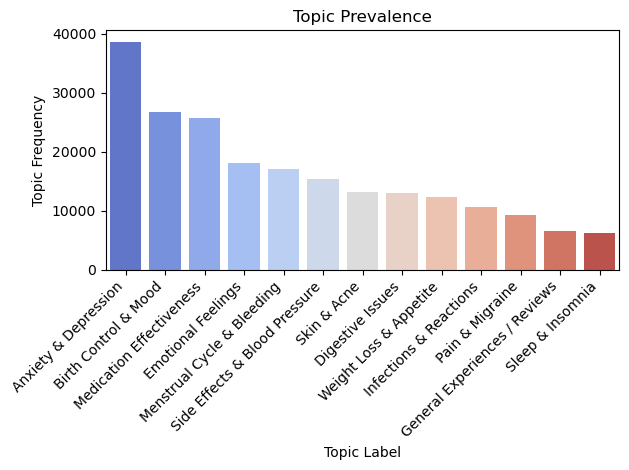

In [50]:

# Visualize with seaborn
sns.barplot(data=topic_summary_df, x="Topic Label", y="Topic Frequency", palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.title("Topic Prevalence")
plt.tight_layout()
plt.show()


In [52]:
# PyLDAVis
pyLDAvis.enable_notebook()
lda_display = gensimvis.prepare(lda_model_final, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=99518) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=99518) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=99518) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarning: This process (pid=99518) is multi-threaded, use of fork() may lead to deadlocks in the child.
  pid = os.fork()
/opt/anaconda3/lib/python3.12/site-packages/joblib/externals/loky/backend/fork_exec.py:38: DeprecationWarnin

In [60]:
import pandas as pd
import nltk
from nltk.corpus import stopwords

# Ensure stopwords are downloaded
nltk.download('stopwords')

# Load your dataset
file_path = "/Users/jewelkang/Desktop/SMU/Year 1 Sem 2/Text Analytics/Text Analytics Project/drug_no.xlsx"
df = pd.read_excel(file_path)

# Drop rows with missing reviews
df = df.dropna(subset=['review'])
reviews = df['review'].astype(str).tolist()

# Define custom stopwords (same ones that gave you best results)
custom_stopwords = set(stopwords.words('english')).union({
    "i039", "v", "amp", "use", "take", "get", "like", "work", 
    "year", "month", "week", "day", "first", "one", "two", "three", 
    "also", "since", "may", "could", "new",
    "im", "ive", "dont", "didnt", "doesnt", "wasnt", "arent", "isnt",
    "couldnt", "shouldnt", "wouldnt", "youre", "theyre", "weve", "youve",
    "doctor", "said", "told", "know", "see", "took", "read", "would", "still", "got"
})

# Remove stopwords only
def remove_stopwords_only(text):
    words = text.lower().split()
    return [word for word in words if word not in custom_stopwords]

# Apply
cleaned_reviews = [" ".join(remove_stopwords_only(review)) for review in reviews]

# Save to CSV
df_cleaned = pd.DataFrame({
    "original_review": reviews,
    "cleaned_review": cleaned_reviews
})

output_path = "/Users/jewelkang/Desktop/SMU/Year 1 Sem 2/Text Analytics/Text Analytics Project/reviews_stopwords_removed.csv"
df_cleaned.to_csv(output_path, index=False)

print(f"✅ Cleaned reviews (stopwords removed) saved to: {output_path}")


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jewelkang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/opt/anaconda3/lib/python3.12/site-packages/openpyxl/packaging/core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()
/opt/anaconda3/lib/python3.12/site-packages/openpyxl/packaging/core.py:99: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  now = datetime.datetime.utcnow()


✅ Cleaned reviews (stopwords removed) saved to: /Users/jewelkang/Desktop/SMU/Year 1 Sem 2/Text Analytics/Text Analytics Project/reviews_stopwords_removed.csv


<Figure size 640x480 with 0 Axes>